# Import the necessary libraries

In [3]:
import sys
import os
import matplotlib.pyplot as plt
import seaborn as sns
import logging
import pandas as pd

# Configure logging
logging.basicConfig(filename='../logs/',
                    level=logging.INFO,
                    format='%(asctime)s:%(levelname)s:%(message)s')
  

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../scripts')))
from load_csv_data import Load_CSV_Data
from missing_values_handler import handle_missing_values
from data_cleaning import clean_data
from eda import eda_univariate, eda_bivariate


# Load data

In [4]:
df = Load_CSV_Data('../data/creditcard.csv')
df.load_csv_data()
df = df.get_data()

Data successfully loaded from ../data/creditcard.csv


In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Data analysis and preprocessing

### Handle missing value

In [6]:
# Handle missing values (choose imputation or drop based on your preference)
df_cleaned = handle_missing_values(df, method='impute', impute_value=0)

# Display the first few rows of the cleaned DataFrame
df_cleaned.head()

Columns with missing values: []
Missing value counts:
Series([], dtype: float64)



,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Clean data

In [7]:
# Perform data cleaning (for example, ensure 'Amount' is a float and remove duplicates)
df_cleaned = clean_data(df_cleaned, dtype_mappings={'Amount': 'float', 'Class': 'int'})

# Check for duplicates and correct data types
print(df_cleaned.dtypes)

Removed 1081 duplicate rows.
Converted column 'Amount' to float.
Converted column 'Class' to int.
Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int32
dtype: object


c:\Users\wubeshet.abera\Projects\Ten-Academy\Fraud-detection-system\scripts\data_cleaning.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col] = df_cleaned[col].astype(dtype)
c:\Users\wubeshet.abera\Projects\Ten-Academy\Fraud-detection-system\scripts\data_cleaning.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col] = df_cleaned[col].astype(dtype)


### EDA

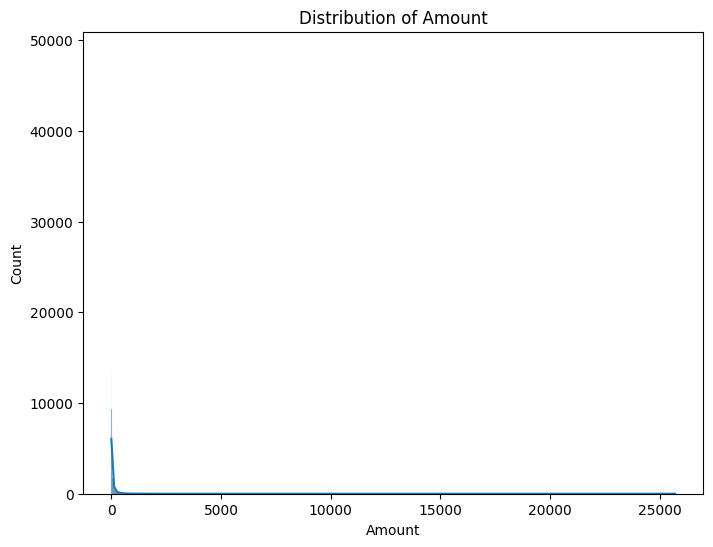

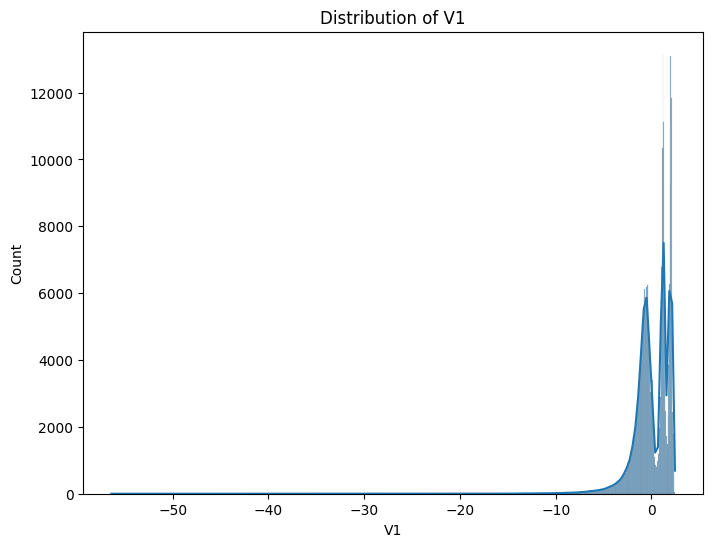

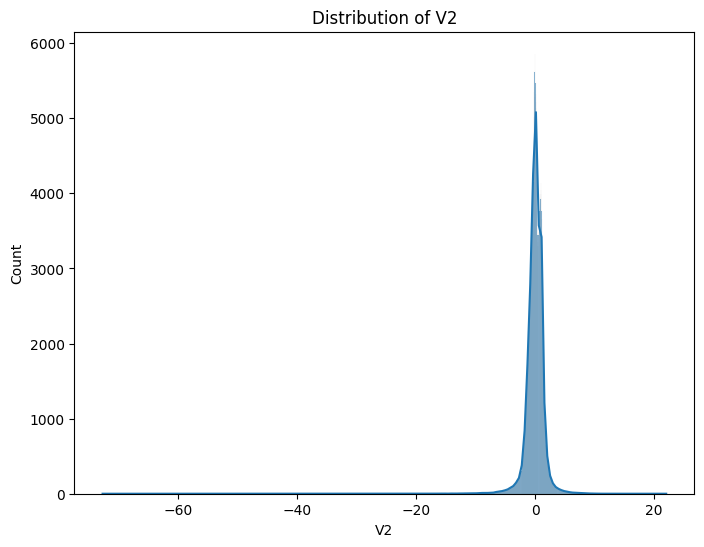

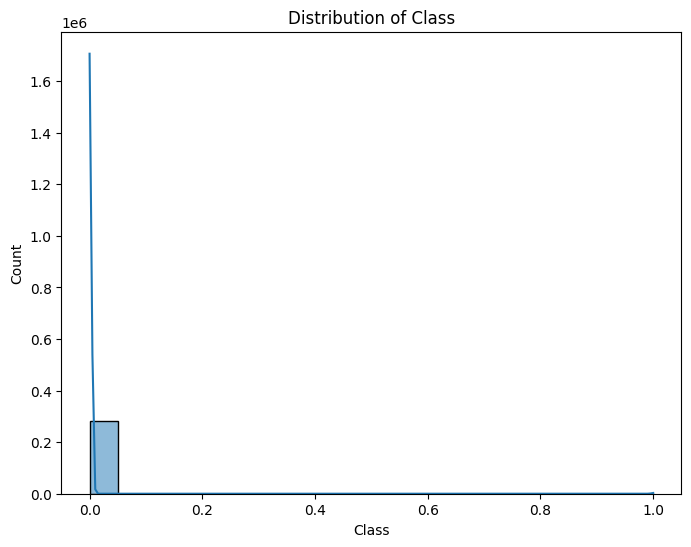

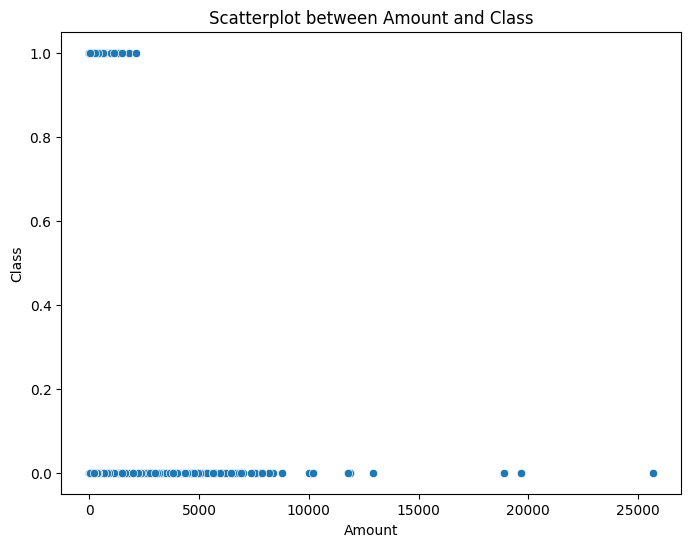

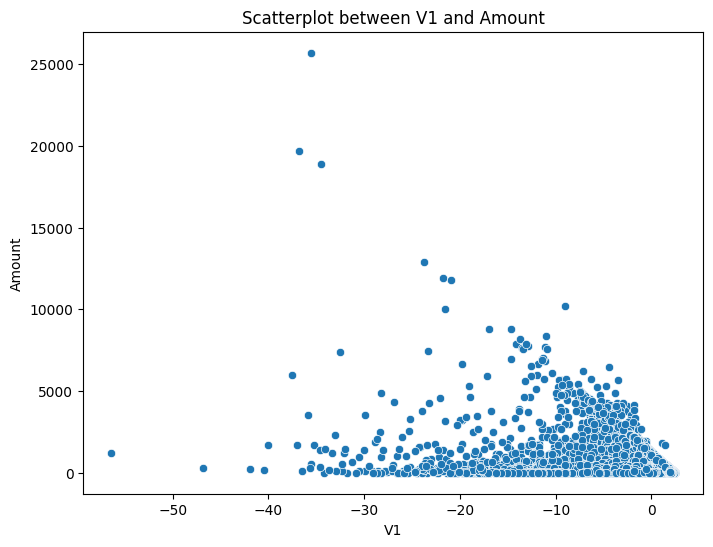

In [8]:
# Univariate analysis (e.g., 'Amount', 'V1', 'V2')
eda_univariate(df_cleaned, columns=['Amount', 'V1', 'V2', 'Class'])

# Bivariate analysis (e.g., 'Amount' vs 'Class', 'V1' vs 'Amount')
eda_bivariate(df_cleaned, 'Amount', 'Class')  # Visualizing how 'Amount' varies with 'Class'
eda_bivariate(df_cleaned, 'V1', 'Amount')  # Relationship between 'V1' and 'Amount'

In [9]:
# Save the cleaned  data
df_cleaned.to_csv("../data/cleaned_credit_card_data.csv", index=False)
print("Cleaned data saved as 'cleaned_credit_card_data.csv'")
df_cleaned.head()

Cleaned data saved as 'cleaned_credit_card_data.csv'


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Normalization and Scaling 

In [10]:
from sklearn.preprocessing import StandardScaler

# Define the columns that need to be scaled (numeric columns)
numeric_columns = ['Time', 'Amount']  # Time and Amount are usually scaled

# Initialize a StandardScaler
scaler = StandardScaler()

# Apply scaling to the selected columns
df_cleaned[numeric_columns] = scaler.fit_transform(df_cleaned[numeric_columns])

# Save the normalized and scaled data
df_cleaned.to_csv("../data/normalized_scaled_credit_data.csv", index=False)
print("Normalized and scaled credit card data saved as 'normalized_scaled_credit_data.csv'")


df_cleaned.head()

Normalized and scaled credit card data saved as 'normalized_scaled_credit_data.csv'


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996823,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244200,0
1,-1.996823,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342584,0
2,-1.996802,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.158900,0
3,-1.996802,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.139886,0
4,-1.996781,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073813,0
